<a href="https://colab.research.google.com/github/kurokiasahi222/Uplimit-Intermediate-SQL/blob/main/Ash_Kuroki_Week_3_Project_Intermediate_SQL_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 1. DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.
> 2. SHARE SETTINGS: In the new notebook, set the sharing settings to "Anyone with the link" by clicking "Share" on the top right corner.





Welcome to this third week's project for *Intermediate SQL*!

This week's lecture and material on Uplimit showed you how to write joins in SQL and combine that with other things you learned in Week 1 and 2. For this project we further your understanding of these concepts by delving a bit deeper. However, for everything covered in this project, you can find related examples in our course material.


# **Prerequisite configuration**
Below we install the software required to run this project. Please make sure to **RUN IT** by clicking on the play-button icon and to feel free to ignore the content of these two hidden cells.

In [3]:
%%capture
!pip install git+https://github.com/uplimit/course-intermediate-sql.git

In [4]:
import pandas as pd
from IPython.display import display, HTML
from sql_course import run as sql_run
from sql_course import check

# Show all the rows (instead of only a few)
pd.set_option("display.max_rows", None)

# Set precision to max 2 decimals
pd.set_option('display.precision', 2)

# Set CSS Style for Table
# Make it work with night & light mode
# - Alternating rows
# - th elements
# - td elements
css_style = '''
<style>
  html {
    --td-font-color: black;
    --font-color: black;
    --background-color: #e0e0e0;
  }
  html[theme=dark] {
    --td-font-color: white;
    --font-color: black;
    --background-color: #6688ff;
  }
  th {
    background: #fbd44c;
    color: var(--font-color);
    font-size: 16px;
    text-align: center;
    font-weight: bold;
  }
  tr:nth-child(even) {
    background-color: var(--background-color);
    color: var(--font-color);
  }
  td {
    font-size: 14px;
    color: var(--td-font-color);
  }
</style>
'''


def run(sql_query):
  df = sql_run(sql_query)

  # Puts the scrollbar next to the DataFrame
  display(HTML(css_style +
               "<div style='max-height: 500px; overflow: auto; width: fit-content; border-style: solid;" +
               " border-width: 1px; border-color: #0139fe; font-family: GT Planar,Inter,Arial,sans-serif;'>" +
               df.style.to_html() +
               "</div>"))


# **Schema:**

As we discussed in the lessons, the `courses` table from Week 1 has been replaced with the five tables below:
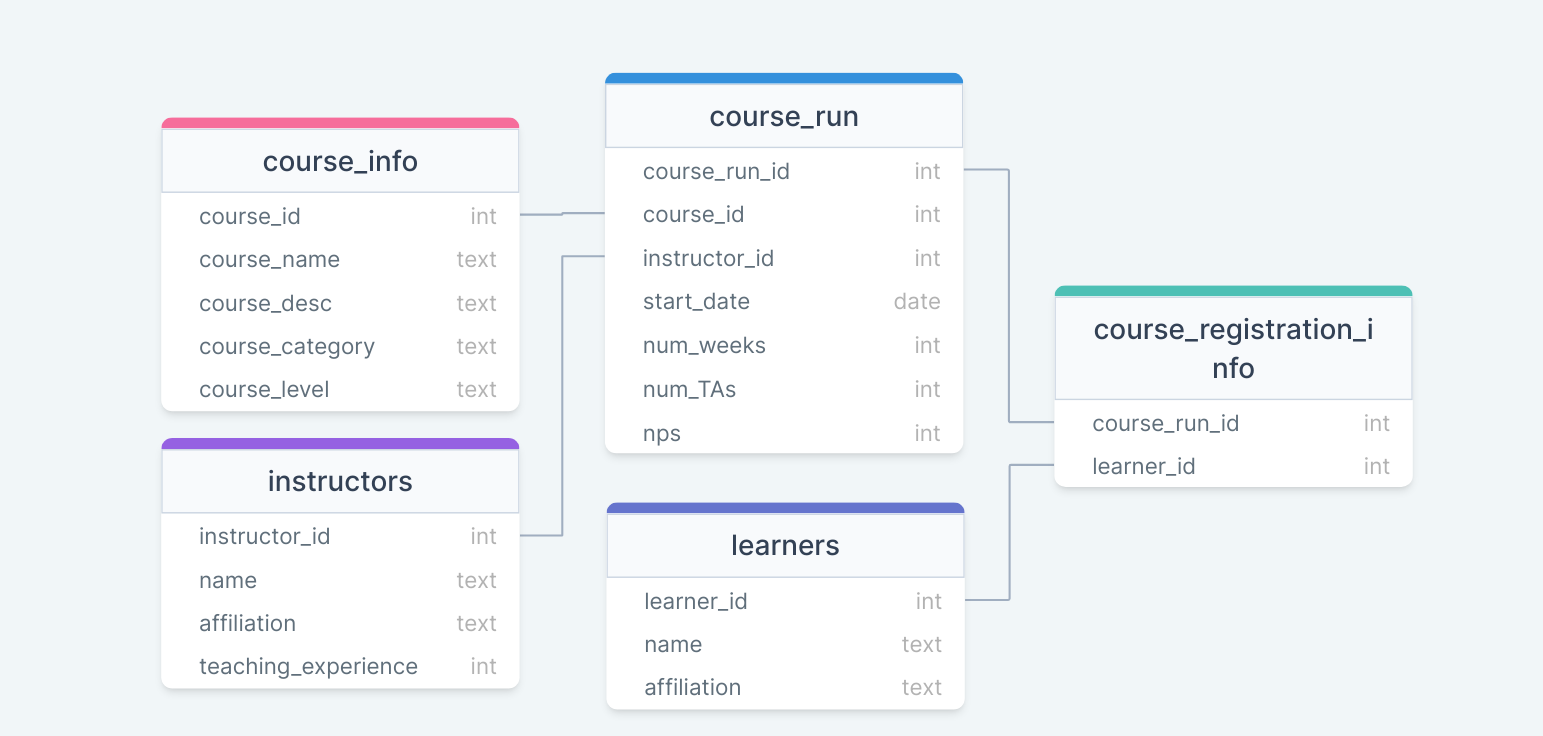

# **Create Table Statement:**

```
CREATE TABLE course_info (
  course_id INTEGER,
  course_name TEXT,
  course_desc TEXT,
  course_category TEXT,
  course_level TEXT
);
```

```
CREATE TABLE instructors (
  instructor_id INTEGER,
  name TEXT,
  affiliation TEXT,
  teaching_experience INTEGER
);
```

```
CREATE TABLE learners (
  learner_id INTEGER,
  name TEXT,
  affiliation TEXT
);
```

```
CREATE TABLE course_run (
  course_run_id INTEGER,
  course_id INTEGER,
  instructor_id INTEGER,
  start_date DATE,
  num_weeks INTEGER,
  num_TAs INTEGER,
  nps INTEGER
);
```

```
CREATE TABLE course_registration_info (
  course_run_id INTEGER,
  learner_id INTEGER
);
```

# **Disclaimer**

Any resemblance of the data in this table to anything real (other than the names and descriptions of courses) is entirely random (could have been my pseudo random generator or my own imagination, since it isn't easy to distinguish between the two :-), so do not stress yourself out trying to make sense of any categorization, such as why a course run might even overlap with another run and other such niceties).

# **Preamble**


Please take care to not use the `courses` table from last week in any of your queries. You don't need that table any longer - in fact the goal of this week's project is to work using the normalized schema described above. Although you may be able to get correct answers for some of the queries by using the old `courses` table, please ensure that you're using the new table names this week.

# **Part 1 - Digging into Machine Learning Courses:**



You have heard from your boss that Machine Learning is a very important category for the Uplimit business, and it would be very good to keep expanding the scope of the courses in this broad area. But first, we should understand reality as it is today. So, your logical next question:




In [ ]:
### Question: q2_1_1
### Determine the number of unique learners that have registered for
### courses under the category 'Machine Learning'.
### Hint: Table Relationships. How are course_info, course_run,
### and course_registration_info connected? Which columns can you use to join these tables?
### Output columns: distinct_learner_count
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_id,
      ci.course_category,
      cr.course_run_id
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  ),
  course_info_run_register AS (
    SELECT
      cir.*,
      cri.learner_id
    FROM course_info_run AS cir
    LEFT JOIN course_registration_info cri
      on cir.course_run_id = cri.course_run_id
  )

  SELECT COUNT(DISTINCT(learner_id)) AS distinct_learner_count
  FROM course_info_run_register
  WHERE course_category = "Machine Learning"
"""

run(query)
check(q2_1_1 = query)

,distinct_learner_count
0,9646


-------------------
Your SQL query is correct!


Trends Over Time: With the initial figures in hand, a thought occurs to you. Has the Machine Learning trend been consistent over the years? Or is there a specific year where the interest spiked? Understanding this would provide valuable insights into whether the interest in ML is a recent phenomenon or if Uplimit has been the go-to place for ML enthusiasts for years.

In [ ]:
### Question: q2_1_2
### For the 'Machine Learning' course category,
### determine the number of unique learners registered each year.
### Output Columns: year, distinct_learner_count

query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_id,
      ci.course_category,
      cr.course_run_id,
      cr.start_date
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  ),
  course_info_run_register AS (
    SELECT
      cir.*,
      cri.learner_id,
      strftime("%Y", cir.start_date) AS year
    FROM course_info_run AS cir
    LEFT JOIN course_registration_info cri
      on cir.course_run_id = cri.course_run_id
  )
  SELECT
    year,
    COUNT(DISTINCT(learner_id)) AS distinct_learner_count
  FROM course_info_run_register
  WHERE course_category = "Machine Learning"
  GROUP BY year
"""

run(query)
check(q2_1_2 = query)

,year,distinct_learner_count
0,2016,3489
1,2017,3718
2,2018,3409
3,2019,3243
4,2020,4140
5,2021,2904
6,2022,2831
7,2023,2953


-------------------
Your SQL query is correct!


**Question to Ponder:** Does the sum of the counts per year match up with the answer to the first query? Why or why not?


**A:** It does not. Probably because distinct learner can take courses each year.



Spotlight on the Stars: Now with a broader perspective in hand, it's time to zoom in on the details. Every course category invariably has its superstar - the one course that has charmed the learners, proving to be an undeniable hit. Among all our Machine Learning courses, which one has emerged as the superstar?

In [ ]:
### Question: q2_1_3
### Identify the course run with the most registered unique learners among all courses
### that include the phrase 'machine learning' in their descriptions.
### Report the course_run_id, course_name, course_category, start_date, nps (net promoter score),
### and the number of distinct learners registered for this course run.
### In case of a tie for the largest number of learners, any of the tied course runs can be chosen.
### Output Columns: course_run_id, course_name, course_category, start_date, nps, distinct_learner_count

query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_id,
      ci.course_name,
      ci.course_category,
      cr.course_run_id,
      cr.nps,
      cr.start_date
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE LOWER(ci.course_desc) LIKE '%machine learning%'
  ),
  course_info_run_register AS (
    SELECT
      cir.*,
      cri.learner_id
    FROM course_info_run AS cir
    LEFT JOIN course_registration_info cri
      on cir.course_run_id = cri.course_run_id
  )
  SELECT
    course_run_id,
    course_name,
    course_category,
    nps,
    start_date,
    COUNT(DISTINCT(learner_id)) AS distinct_learner_count
  FROM course_info_run_register
  GROUP BY course_run_id, course_name, course_category, start_date, nps
  ORDER BY distinct_learner_count DESC
  LIMIT 1
"""

run(query)
check(q2_1_3 = query)

,course_run_id,course_name,course_category,nps,start_date,distinct_learner_count
0,972,Search with Machine Learning,Machine Learning,67,2016-02-12 09:08:00,195


-------------------
Your SQL query is correct!


With the star course identified, a different angle of curiosity strikes. Machine Learning isn't just a trendy subject; it's an essential tool for many industries. And one industry that stands out in its application of Machine Learning is the banking sector. Banks utilize ML for everything, from fraud detection to customer service chatbots.

We know Machine Learning has its charm, but how does it compare to the rest when it comes to impressing our learners?

In [48]:
### Question: q2_1_4
### Determine the number of course runs within the 'Machine Learning' category for each calendar year.
### Only count course runs that have seen registrations from at least one learner affiliated with a bank
### (look for the word 'Bank' in the affiliation).
### Output columns: year, count_by_year

query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_id,
      ci.course_category,
      cr.course_run_id,
      cr.nps,
      strftime("%Y", cr.start_date) AS year
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE ci.course_category = 'Machine Learning'
  ),
  course_info_run_register AS (
    SELECT
      cir.*,
      cri.learner_id
    FROM course_info_run AS cir
    LEFT JOIN course_registration_info AS cri
      on cir.course_run_id = cri.course_run_id
  ),
  course_info_run_register_learners AS (
    SELECT
      cirr.course_run_id,
      cirr.year
    FROM course_info_run_register AS cirr
    LEFT JOIN learners as l
      on cirr.learner_id = l.learner_id
    WHERE LOWER(affiliation) LIKE '%bank%'
  )
  SELECT
    year,
    COUNT(DISTINCT(course_run_id)) AS count_by_year
  FROM course_info_run_register_learners
  GROUP BY year
  ORDER BY year
"""

run(query)
check(q2_1_4 = query)

,year,count_by_year
0,2016,19
1,2017,26
2,2018,18
3,2019,17
4,2020,20
5,2021,18
6,2022,17
7,2023,10


-------------------
Your SQL query is correct!


## Question!!!

For the above question why do I have to use

```
COUNT(DISTINCT(course_run_id)) AS count_by_year
```
in line 40? If we want to count courses why not count the course that have been offered more than once during a calendar year?

Also for filtering banks, this is obviously not a great way. Like "Wells Fargo" do not have bank in a affiliation but it is obviously a bank. Would you think learners table should have a affiliation_category to mitigate these mistakes?


## END


# **Part 2 - Analysis across course categories**
Diving deeper into Uplimit's diverse course offerings, it becomes imperative to discern the evolving trends and preferences spanning different categories. This exploration seeks not only to measure the breadth and reception of courses beyond a single discipline but also to comprehend the trajectory of each category over time.

How does each subject fare through the passage of time?

In [58]:
### Question: q2_2_1
### Report the number of course runs for each calendar year and course category combination.
### Sort the results first by category in ascending order and then by year in descending order.
### Output columns: year, category, count_by_year
query = """
  WITH
  course_info_run AS (
    SELECT
      cr.course_run_id,
      ci.course_category,
      strftime("%Y", cr.start_date) AS year
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  )
  SELECT DISTINCT
    year,
    course_category AS category,
    COUNT(DISTINCT(course_run_id)) AS count_by_year
  FROM course_info_run
  GROUP BY  year, course_category
  ORDER BY category, year DESC
"""

run(query)
check(q2_2_1 = query)

,year,category,count_by_year
0,2023,Data Engineering,28
1,2022,Data Engineering,26
2,2021,Data Engineering,36
3,2020,Data Engineering,35
4,2019,Data Engineering,28
5,2018,Data Engineering,40
6,2017,Data Engineering,25
7,2016,Data Engineering,34
8,2023,Data Science,15
9,2022,Data Science,12


-------------------
Your SQL query is correct!


We know Machine Learning has its charm, but how does it compare to the rest when it comes to impressing our learners?

In [64]:
### Question: q2_2_2
### Generate a report that compares the average Net Promoter Score (NPS) of courses
### in the 'Machine Learning' category against the average NPS of courses from all other categories.
### Output columns: machine_learning_nps, rest_nps
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_category,
      cr.course_run_id,
      cr.nps
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  )
  SELECT
    AVG(
      CASE
        WHEN course_category = 'Machine Learning' THEN nps
        ELSE NULL
      END) AS machine_learning_nps,
    AVG(
      CASE
        WHEN course_category != 'Machine Learning' THEN nps
        ELSE NULL
      END) AS rest_nps
  FROM course_info_run
"""

run(query)
check(q2_2_2 = query)

,machine_learning_nps,rest_nps
0,74.845161,74.159652


-------------------
Your SQL query is correct!


# **Part 3 - Analysing the impact of the length of a course run**
After our deep dive into the world of Machine Learning, it's time to zoom out and widen our lens. Do longer courses truly offer a richer learning experience, or do concise ones strike a chord with learners? Let's explore further and gauge the impact of course duration on learner reception!






In [67]:
### Question: q2_3_1
### Generate a report that aggregates the minimum, maximum, and average Net Promoter Score (NPS)
### for course runs based on their duration in weeks.
### Output columns: num_weeks, min_nps, max_nps, avg_nps
query = """
  WITH
  course_info_run AS (
    SELECT
      cr.course_run_id,
      cr.nps,
      cr.num_weeks,
      strftime("%Y", cr.start_date) AS year
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  )
  SELECT
    num_weeks,
    MIN(nps) AS min_nps,
    MAX(nps) AS max_nps,
    AVG(nps) AS avg_nps
  FROM course_info_run
  GROUP BY num_weeks
"""

run(query)
check(q2_3_1 = query)

,num_weeks,min_nps,max_nps,avg_nps
0,1,51,100,77.757576
1,2,53,99,78.137931
2,3,50,100,75.948276
3,4,51,100,74.451613
4,5,52,100,75.520325
5,6,50,100,74.627273
6,7,50,100,72.411765
7,8,41,100,73.055944
8,9,46,89,63.277778
9,10,47,77,64.117647


-------------------
Your SQL query is correct!


In [68]:
### Question: q2_3_2
### Classify courses based on their duration: Courses lasting 8 weeks or less are categorized as 'normal',
### while those exceeding 8 weeks are 'long'. Call this column course_duration.
### Compute the average Net Promoter Score (NPS) for each combination of course_duration and course_level.
### Hint: The result should have a maximum of four rows, given the two possible values for course_duration and course_level.
### Output columns: course_duration, course_level, avg_nps
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_level,
      cr.course_run_id,
      cr.num_weeks,
      cr.nps
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  )
  SELECT DISTINCT
    CASE
      WHEN num_weeks <=8 THEN 'normal'
      ELSE 'long'
    END AS course_duration,
    course_level,
    AVG(nps) AS avg_nps
  FROM course_info_run
  GROUP BY course_duration, course_level
"""


run(query)
check(q2_3_2 = query)

,course_duration,course_level,avg_nps
0,long,A,70.032258
1,long,B,62.632653
2,normal,A,76.021672
3,normal,B,74.669463


-------------------
Your SQL query is correct!


# **Part 3 - Bonus Question: Using Common Table Expression for Analysis**

This section is bonus and the queries are a bit more complex in this section.

### Question: q2_3_3

In [97]:
query = '''
  WITH
  course_info_run AS (
    SELECT *
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
  )
  SELECT *
  FROM course_info_run
  WHERE course_id = 3

'''
run(query)

,course_id,course_name,course_desc,course_category,course_level,course_run_id,course_id:1,instructor_id,start_date,num_weeks,num_TAs,nps
0,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,9,3,82,2022-11-04 05:42:00,2,2,80
1,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,24,3,133,2021-11-08 15:12:00,2,3,54
2,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,29,3,55,2020-02-11 08:44:00,8,1,67
3,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,35,3,175,2023-05-30 20:14:00,4,1,75
4,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,40,3,24,2020-10-04 16:37:00,8,1,78
5,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,44,3,31,2020-04-19 23:13:00,7,1,88
6,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,49,3,157,2021-01-27 09:05:00,5,1,94
7,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,103,3,152,2018-05-09 18:09:00,7,2,91
8,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,125,3,40,2019-10-05 08:53:00,7,2,73
9,3,How to Implement ML Papers,Learn how to implement the proposed algorithms;models;and techniques from ML papers each week;while learning tips and tricks on debugging the implementation efforts and how to reproduce results in your own applications.,Machine Learning,A,171,3,,2021-04-20 14:38:00,1,1,77


In [115]:
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_level,
      cr.num_weeks,
      ci.course_id,
      cr.nps
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE ci.course_category = 'Machine Learning'
    GROUP BY ci.course_level, cr.num_weeks, ci.course_id
    HAVING AVG(cr.nps) > 70
    ORDER BY ci.course_id
  )
  SELECT *
  FROM course_info_run
"""
run(query)

,course_level,num_weeks,course_id,nps
0,A,1,3,61
1,A,2,3,54
2,A,3,3,62
3,A,4,3,75
4,A,5,3,61
5,A,7,3,68
6,A,8,3,65
7,B,1,5,76
8,B,2,5,63
9,B,3,5,87


In [13]:
### Question: q2_3_3
### Categorize courses based on duration: 'normal' for courses lasting 8 weeks or less and 'long' for courses longer than 8 weeks.
### Compute the average Net Promoter Score (NPS) for each combination of course_duration and course_level.
### Only analyze courses from the 'Machine Learning' category with an average NPS greater than 70.
### Hint #1: Leverage Common Table Expressions (CTEs) to streamline the query.
### Hint #2: Begin by identifying courses within the 'Machine Learning' category that have an average NPS above 70.
### Hint #3: With your curated list of valid courses, categorize them by their duration.
###          Subsequently, compute the average NPS for each combination of course_duration and course_level.
### Output columns: course_duration, course_level, avg_nps

query = """
  WITH
  filter_course AS (
    SELECT
      ci.course_id,
      ci.course_level,
      AVG(cr.nps) AS avg_nps
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE ci.course_category = 'Machine Learning'
    GROUP BY ci.course_id, ci.course_level
    HAVING AVG(cr.nps) > 70
  ),
  course_duration_category AS (
    SELECT
      cr.nps,
      cr.course_id,
      fc.course_level,
      CASE
        WHEN cr.num_weeks <= 8 THEN 'normal'
        ELSE 'long'
      END AS course_duration
    FROM filter_course AS fc
    LEFT JOIN course_run as cr
      ON fc.course_id = cr.course_id
  )
  SELECT DISTINCT
    course_level,
    course_duration,
    AVG(nps) AS avg_nps
  FROM course_duration_category
  GROUP BY course_level, course_duration
"""
run(query)
check(q2_3_3 = query)

,course_level,course_duration,avg_nps
0,A,long,68.111111
1,A,normal,75.821192
2,B,long,62.800000
3,B,normal,75.564885


-------------------
Your SQL query is correct!


#### This is somehow correct

In [112]:
### Question: q2_3_3
### Categorize courses based on duration: 'normal' for courses lasting 8 weeks or less and 'long' for courses longer than 8 weeks.
### Compute the average Net Promoter Score (NPS) for each combination of course_duration and course_level.
### Only analyze courses from the 'Machine Learning' category with an average NPS greater than 70.
### Hint #1: Leverage Common Table Expressions (CTEs) to streamline the query.
### Hint #2: Begin by identifying courses within the 'Machine Learning' category that have an average NPS above 70.
### Hint #3: With your curated list of valid courses, categorize them by their duration.
###          Subsequently, compute the average NPS for each combination of course_duration and course_level.
### Output columns: course_duration, course_level, avg_nps
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_level,
      cr.course_id,
      cr.num_weeks,
      cr.nps
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE ci.course_category = 'Machine Learning'
  )
  SELECT DISTINCT
    CASE
      WHEN num_weeks <=8 THEN 'normal'
      ELSE 'long'
    END AS course_duration,
    course_level,
    AVG(nps) AS avg_nps
  FROM course_info_run
  GROUP BY course_duration, course_level
"""
run(query)
check(q2_3_3 = query)

,course_duration,course_level,avg_nps
0,long,A,68.111111
1,long,B,62.800000
2,normal,A,75.821192
3,normal,B,75.564885


-------------------
Your SQL query is correct!


# **Part 4 - Bonus Question: Troubleshooting and Analytics for Enterprise Customers**
One of your main jobs as an analyst is to handle one-off requests for data and analysis from your customer-facing sales teams. Uplimit works with a number of enterprise customers who send groups of learners as well as supply top quality instructors to Uplimit. As a result, it's important to equip the Uplimit sales teams with the right kind of information and insights.

The account manager for M & T Bank Corporation wants to understand the nps of basic courses attended by more than just a few learners from M & T Bank Corporation provided the instructor is not from M & T Corporation.





In [41]:
### Question: q2_4_1
### Retrieve the course_name, course_run_id, number of learners from 'M & T Bank Corporation',
### and NPS for each course run that meets the following criteria:
### 1) The course has more than 2 learners from 'M & T Bank Corporation'.
### 2) The course is taught by an instructor who isn't from 'M & T Bank Corporation'.
### 3) The course is basic (course_level = 'B')
### Hint: This requires you to join all five tables from this week's project schema.
### Hint: To get the number of learners you will need to group by all other columns
### in the select clause and use count to get to the number of learners.
### Output Columns: course_name, course_run_id, num_learners, nps
query = """
  WITH
  course_info_run AS (
    SELECT
      ci.course_name,
      ci.course_id,
      cr.course_run_id,
      cr.nps,
      cr.instructor_id
    FROM course_info AS ci
    LEFT JOIN course_run AS cr
      ON ci.course_id = cr.course_id
    WHERE course_level = 'B'
  ),
  course_info_run_instructors AS (
    SELECT
      cir.*
    FROM course_info_run AS cir
    LEFT JOIN instructors AS i
      ON cir.instructor_id = i.instructor_id
    WHERE affiliation != 'M & T Bank Corporation'
  ),
  course_info_run_instructors_registration AS (
    SELECT
      ciri.*,
      cri.learner_id
    FROM course_info_run_instructors AS ciri
    LEFT JOIN course_registration_info AS cri
      ON ciri.course_run_id = cri.course_run_id
  ),
  course_info_run_instructors_registration_learners AS (
    SELECT
      cirir.*
    FROM course_info_run_instructors_registration AS cirir
    LEFT JOIN learners AS l
      on cirir.learner_id = l.learner_id
    WHERE affiliation = 'M & T Bank Corporation'
  ),
  course_filter AS (
    SELECT
      course_name,
      course_run_id,
      COUNT(learner_id) AS num_learners,
      nps
    FROM course_info_run_instructors_registration_learners
    GROUP BY course_run_id
    HAVING num_learners > 2
  )
  SELECT *
  FROM course_filter
"""
run(query)
check(q2_4_1 = query)

,course_name,course_run_id,num_learners,nps
0,Python for Data Science,297,3,79
1,FREE Weekend Buildathon: NLP,431,3,75
2,Deep Learning Essentials,451,4,62
3,Data Engineering with Dagster,491,3,72
4,Intro to SQL,710,3,70
5,Analytics Engineering with dbt,901,3,41


-------------------
Your SQL query is correct!


There seems to have been only one course where the nps was particularly low. The account manager sets off to learn more from the course manager about what may have happened during that course. Then they will be able to communicate to their customer that the courses for their learners are predominantly going well, and they may also be able to educate them on the reasons this course was worse and collect feedback from the customer on that course as well.

# **Conclusion:**

Wow! You have become a master at combining tables. This means you are ready to drive serious impact on any set of tables in a production environment.